<a href="https://colab.research.google.com/github/ikhsan-muhammad/p01-airplane_cargo/blob/main/p01-airplane-cargo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airplane Cargo Analysist

<img src="https://indianonlineseller.com/images/blogs/editor/amazon-transportation-services-helping-hand-or-grabbing-hand.jpg" alt="Flowers in Chania" style="border-radius: 15px 15px 15px 15px;"/>

**Metadata:**

https://data.sfgov.org/Transportation/Air-Traffic-Cargo-Statistics/u397-j8nr/about_data [san francisco air cargo data]

# Understanding Problem

**Problem case:**
* Evaluate the performance of different airlines based on cargo metrics, identifying top performers and areas for improvement.
* Analyze patterns in different types of cargo activities to understand trends in the industry, such as the prevalence of express shipments or bulk cargo.
* Examine cargo operations over time to identify seasonality, peak periods, or long-term trends in air cargo demand.
* Benchmark the performance of specific airlines, regions, or aircraft types against industry averages to assess competitiveness
* Utilize historical data to build predictive models for future air cargo trends, helping stakeholders make informed decisions.

# Set-UP

In [24]:
# from google.colab import drive
# drive.mount('/content/drive')

In [25]:
# # pull data from kaggle datasets
# ! pip install kaggle
# ! mkdir ~/.kaggle
# ! cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download ikhsanmhmd/air-traffic-cargo-statistic
# ! unzip /content/air-traffic-cargo-statistic.zip
# ! rm /content/air-traffic-cargo-statistic.zip

# Data Wrangling

In [26]:
#import necessary library
import pandas as pd
pd.plotting.register_matplotlib_converters
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#set all things that needed
pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows',200)
pd.reset_option('display.max_rows')
plt.style.use('dark_background')

# with kaggle
# df = pd.read_csv('/kaggle/input/air-traffic-cargo-statistic/Air_Traffic_Cargo_Statistics.csv', parse_dates=[1,13,14], date_format='mixed')
# with colab
# df = pd.read_csv('/content/drive/MyDrive/Ori Data Import/Air_Traffic_Cargo_Statistics.csv', parse_dates=[1,13,14], date_format='mixed')
# local
df = pd.read_csv('D:/.project/p01-airplane_cargo/Air_Traffic_Cargo_Statistics.csv', parse_dates=[1,13,14], date_format='mixed')

In [27]:
# df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55038 entries, 0 to 55037
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Activity Period              55038 non-null  int64         
 1   Activity Period Start Date   55038 non-null  datetime64[ns]
 2   Operating Airline            55038 non-null  object        
 3   Operating Airline IATA Code  54460 non-null  object        
 4   Published Airline            55038 non-null  object        
 5   Published Airline IATA Code  54460 non-null  object        
 6   GEO Summary                  55038 non-null  object        
 7   GEO Region                   55038 non-null  object        
 8   Activity Type Code           55038 non-null  object        
 9   Cargo Type Code              55038 non-null  object        
 10  Cargo Aircraft Type          55038 non-null  object        
 11  Cargo Weight LBS             55038 non-nu

In [28]:
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS,data_as_of,data_loaded_at
0,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,349048,158.328173,2024-06-20 13:00:06,2024-06-22 15:01:45
1,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,122003,55.340561,2024-06-20 13:00:06,2024-06-22 15:01:45
2,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,514450,233.354520,2024-06-20 13:00:06,2024-06-22 15:01:45
3,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Mail,Passenger,89776,40.722394,2024-06-20 13:00:06,2024-06-22 15:01:45
4,199907,1999-07-01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Cargo,Passenger,13086,5.935810,2024-06-20 13:00:06,2024-06-22 15:01:45


In [29]:
#select all columns that we need
selected_df = df[[
#     'Activity Period',
    'Activity Period Start Date',
    'Operating Airline',
#     'Operating Airline IATA Code',
    'Published Airline',
#     'Published Airline IATA Code',
    'GEO Summary',
    'GEO Region',
    'Activity Type Code',
    'Cargo Type Code',
    'Cargo Aircraft Type',
    'Cargo Weight LBS',
    # 'Cargo Metric TONS',
#     'data_as_of',
#     'data_loaded_at'
]].copy()

selected_df

,Activity Period Start Date,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS
0,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048
1,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003
2,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450
3,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776
4,1999-07-01,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086
...,...,...,...,...,...,...,...,...,...
55033,2024-04-01,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Cargo,Passenger,19323
55034,2024-04-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,414753
55035,2024-04-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,174269
55036,2024-04-01,ZIPAIR Tokyo Inc,ZIPAIR Tokyo Inc,International,Asia,Deplaned,Cargo,Passenger,845137


In [30]:
#change all columns name
selected_df = selected_df.rename(columns={
    'Activity Period Start Date' : 'activity_period_start_date',
    'Operating Airline' : 'operating_airline',
    'Published Airline' : 'published_airline',
    'GEO Summary' : 'geo_summary',
    'GEO Region' : 'geo_region',
    'Activity Type Code' : 'activity_type_code',
    'Cargo Type Code' : 'cargo_type_code',
    'Cargo Aircraft Type' : 'cargo_aircraft_type',
    'Cargo Weight LBS' : 'cargo_weight_lbs'
}) # type: ignore

selected_df

,activity_period_start_date,operating_airline,published_airline,geo_summary,geo_region,activity_type_code,cargo_type_code,cargo_aircraft_type,cargo_weight_lbs
0,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048
1,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003
2,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450
3,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776
4,1999-07-01,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086
...,...,...,...,...,...,...,...,...,...
55033,2024-04-01,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Cargo,Passenger,19323
55034,2024-04-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,414753
55035,2024-04-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,174269
55036,2024-04-01,ZIPAIR Tokyo Inc,ZIPAIR Tokyo Inc,International,Asia,Deplaned,Cargo,Passenger,845137


In [31]:
#Always run this cell one time, cant do it twice
selected_df['activity_period_start_date'] = selected_df['activity_period_start_date'].dt.to_period('M')
selected_df

,activity_period_start_date,operating_airline,published_airline,geo_summary,geo_region,activity_type_code,cargo_type_code,cargo_aircraft_type,cargo_weight_lbs
0,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048
1,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003
2,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450
3,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776
4,1999-07,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086
...,...,...,...,...,...,...,...,...,...
55033,2024-04,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Cargo,Passenger,19323
55034,2024-04,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,414753
55035,2024-04,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,174269
55036,2024-04,ZIPAIR Tokyo Inc,ZIPAIR Tokyo Inc,International,Asia,Deplaned,Cargo,Passenger,845137


In [32]:
selected_df['operating_airline'].value_counts().sort_index()

operating_airline
21 Air, LLC             28
ABX Air                346
ASTAR USA, LLC          16
ATA Airlines           324
Active Aero Charter      2
                      ... 
Virgin America           5
Virgin Atlantic        718
WOW Air                 55
World Airways           36
ZIPAIR Tokyo Inc        17
Name: count, Length: 132, dtype: int64

In [33]:
#see all airline names contain (,)
selected_df['operating_airline'].loc[selected_df['operating_airline'].str.contains(',')].value_counts().index

Index(['All Nippon Company Airways, Ltd.', 'TACA International Airlines, S.A.',
       'Aer Lingus, Ltd.', 'Atlas Air, Inc', 'COPA Airlines, Inc.',
       'Air Transport International, Inc.', 'Atlas Air, Inc. (inactive)',
       'China Eastern Airlines, Inc', 'Emery Worldwide Airlines, Inc.',
       '21 Air, LLC', 'ASTAR USA, LLC', 'Air Transport International, LLC.',
       'Total Airport Services, Inc. (Inactive)', 'Norse Atlantic UK, Ltd.',
       'Envoy Air, Inc.'],
      dtype='object', name='operating_airline')

In [34]:
#remove extension from airlines name
def airline_name_cleaner(selected_df):
    selected_df = selected_df.replace(r'\bInc\b|\bLLC\b|\bLimited\b|\bLtd\b|\binactive\b|\bPre 07/01/2013\b|\bbecame Delta\b|\bLTD\b|\bGmbH\b|\bEHF\b|\bASA\b|\bCO\b|\bJSC\b|\bSPA\b|\bSA\b', '',regex=True).copy()
    selected_df = selected_df.replace(r'\([^)]*\)|[-,.]', '', regex=True)
    selected_df = selected_df.map(lambda x: x.strip() if isinstance(x, str) else x) #remove all white space
    return selected_df

selected_df = airline_name_cleaner(selected_df)
selected_df['operating_airline'].value_counts().sort_index()

operating_airline
21 Air                  28
ABX Air                346
ASTAR USA               16
ATA Airlines           324
Active Aero Charter      2
                      ... 
Virgin America           5
Virgin Atlantic        718
WOW Air                 55
World Airways           36
ZIPAIR Tokyo            17
Name: count, Length: 128, dtype: int64

In [35]:
selected_df['operating_airline'].value_counts().sort_index()

operating_airline
21 Air                  28
ABX Air                346
ASTAR USA               16
ATA Airlines           324
Active Aero Charter      2
                      ... 
Virgin America           5
Virgin Atlantic        718
WOW Air                 55
World Airways           36
ZIPAIR Tokyo            17
Name: count, Length: 128, dtype: int64

In [36]:
selected_df.describe()

,cargo_weight_lbs
count,5.503800e+04
mean,5.204636e+05
std,1.023128e+06
min,1.000000e+00
25%,1.936650e+04
50%,1.442165e+05
75%,5.915170e+05
max,2.381234e+07


In [37]:
selected_df.describe(include='object')

,operating_airline,published_airline,geo_summary,geo_region,activity_type_code,cargo_type_code,cargo_aircraft_type
count,55038,55038,55038,55038,55038,55038,55038
unique,128,116,2,9,2,3,3
top,United Airlines,United Airlines,International,Asia,Deplaned,Cargo,Passenger
freq,9455,9476,38475,19314,28117,30675,45285


## Exploratory Data Analysis (EDA)

**Problem Case:**
* Evaluate the performance of different airlines based on cargo metrics, identifying top performers and areas for improvement.
* Analyze patterns in different types of cargo activities to understand trends in the industry, such as the prevalence of express shipments or bulk cargo.
* Examine cargo operations over time to identify seasonality, peak periods, or long-term trends in air cargo demand.
* Benchmark the performance of specific airlines, regions, or aircraft types against industry averages to assess competitiveness
* Utilize historical data to build predictive models for future air cargo trends, helping stakeholders make informed decisions.

**Problem Case**
1. Between 1999 to 2024, which airline get increased air traffic? Which get less air traffic?
2. Is there any distinct characteristics between domestic and international flight?
3. What aircraft type often fly internationally?
4. Describe the cargo weight variable and its influence across the data

In [38]:
selected_df

,activity_period_start_date,operating_airline,published_airline,geo_summary,geo_region,activity_type_code,cargo_type_code,cargo_aircraft_type,cargo_weight_lbs
0,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048
1,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003
2,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450
3,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776
4,1999-07,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086
...,...,...,...,...,...,...,...,...,...
55033,2024-04,Vietnam Airlines,Vietnam Airlines,International,Asia,Enplaned,Cargo,Passenger,19323
55034,2024-04,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,414753
55035,2024-04,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,174269
55036,2024-04,ZIPAIR Tokyo,ZIPAIR Tokyo,International,Asia,Deplaned,Cargo,Passenger,845137


In [48]:
# Export clean file
# path = 'D:/.project/datasets/'
# file_name = 'clean_data_aircargo.xlsx'
# full_path = path+file_name 
# selected_df.to_excel(full_path, index=False)

## 1. Evaluate the performance of different airlines based on cargo metrics, Identifying top performers airlines and areas for improvement.

In [49]:
# Barh-plot function
def barh_plot(data,y_pos,hig_count=0,title='',subtitle=''):
    #plotting
    fig, ax = plt.subplots(figsize=(12,6))
    plt.ticklabel_format(style='plain')

    color_map = ['#B6BDC2' for _ in range(len(data))]
    for i in range(min(hig_count, len(data))):
        color_map[i] = '#276BA3'

    # Title and sub-title
    fig.text(0.12, 0.97, title, fontsize=15, fontweight='bold', fontfamily='serif')
    fig.text(0.12, 0.92, subtitle, fontsize=12, fontweight='light', fontfamily='serif')

    #y_pos:jumlah data yang akan di tampilkan
    ax.barh(y_pos, data, color=color_map)
    ax.set_yticks(y_pos, labels=data.index)
    ax.set_xlabel('Lbs')
    ax.invert_yaxis()

    #remove all border
    for i in ['top','right']:
        ax.spines[i].set_visible(False)

    #annotations
    for i, j in zip(data.index,y_pos):
        ax.annotate(f"{data[i]}",
                    xy=(data[i] + 10e6, y_pos[j]),
                    va='center', fontweight='light', fontfamily='serif')

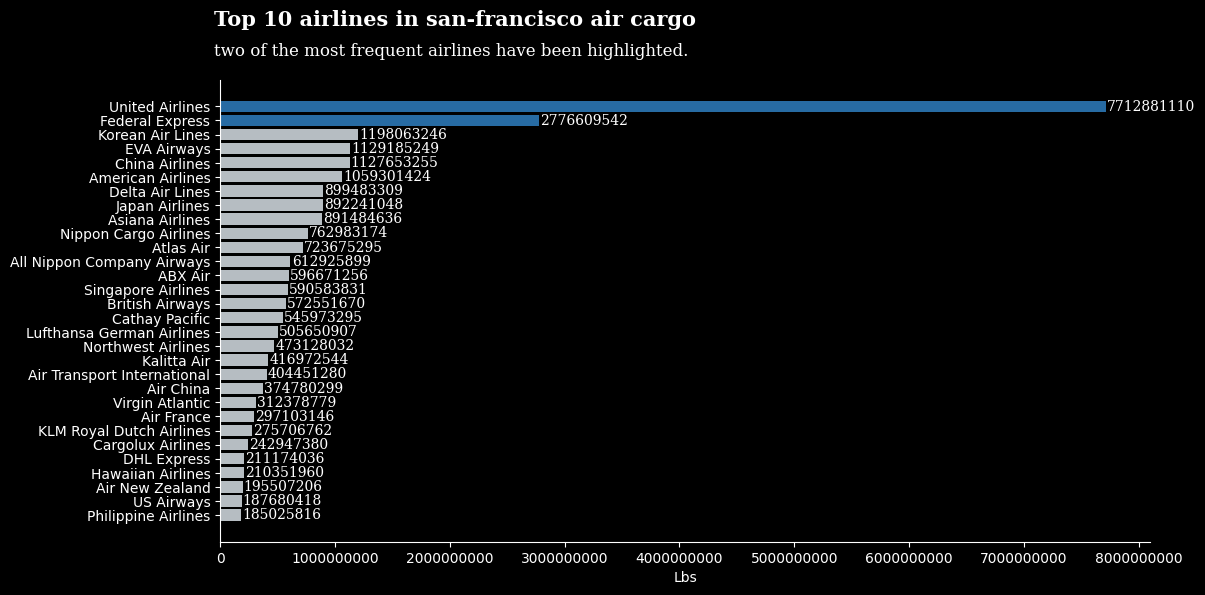

In [41]:
#data1
lbs_per_airline = selected_df.groupby('operating_airline')['cargo_weight_lbs'].sum().round(2).sort_values(ascending=False)
top10_airline = lbs_per_airline[:30]
y_pos = np.arange(len(top10_airline))

#plot1
title = 'Top 10 airlines in san-francisco air cargo'
subtitle = 'two of the most frequent airlines have been highlighted.'
barh_plot(top10_airline,y_pos,2,title=title,subtitle=subtitle)

Dari visualisasi barplot diatas dapat dilihat jika sebagian besar operating airline-cargo san-francisco didominasi oleh 2 airlines (united airlines dan federal express) dengan nilai lbs cargo masing-masing 7.712881e+09 lbs dan 2.776609e+09 lbs. Jumlah ini jauh diatas rata-rata lbs airlines lainnya sebesar 2.237912e+08 lbs.

<Axes: title={'center': 'lbs per Airline'}, xlabel='operating_airline'>

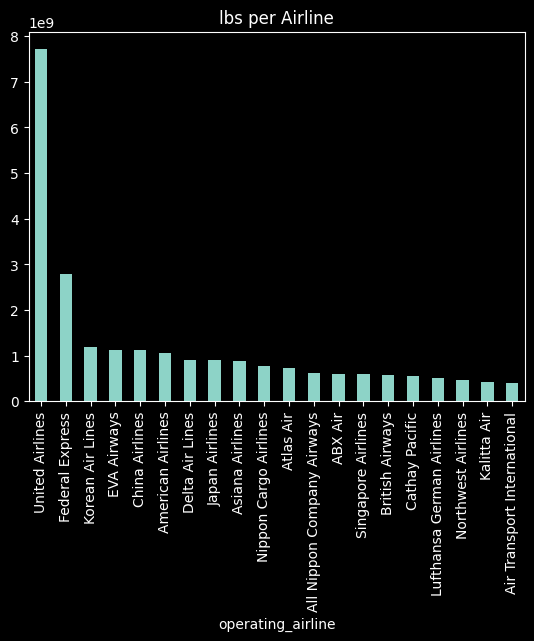

In [42]:
same_airlines = selected_df.query('operating_airline == published_airline')[['operating_airline', 'published_airline', 'geo_summary','cargo_weight_lbs']]
same_airlines.groupby('operating_airline')['cargo_weight_lbs'].sum().sort_values(ascending=False)[:20].plot.bar(title='lbs per Airline')

In [43]:
# Corr Operating Airline X Publish Airline
# selected_df[['operating_airline','published_airline']].value_counts().head()
dif_airline = selected_df.query('operating_airline != published_airline')[['operating_airline', 'published_airline', 'geo_summary','cargo_weight_lbs']]
dif_airline

,operating_airline,published_airline,geo_summary,cargo_weight_lbs
159,SkyWest Airlines,United Airlines,Domestic,7437
178,Trans States Airlines,US Airways,Domestic,134
179,Trans States Airlines,US Airways,Domestic,10
180,Trans States Airlines,US Airways,Domestic,23
373,SkyWest Airlines,United Airlines,Domestic,7211
...,...,...,...,...
54981,SkyWest Airlines,American Airlines,Domestic,234
54982,SkyWest Airlines,Alaska Airlines,Domestic,14215
54983,SkyWest Airlines,Alaska Airlines,Domestic,1256
54984,SkyWest Airlines,Alaska Airlines,Domestic,15835


# [SanBox]

In [44]:
# decade_data = dfcopy[dfcopy.activity_period_start_date.dt.year >= 2014].reset_index(drop=True)
# decade_data.info()
# # data for multiple line chart
# grouped = decade_data.groupby([decade_data.activity_period_start_date.dt.year, 'operating_airline'])['cargo_weight_lbs'].sum().round(2).sort_values(ascending=False).reset_index()
# pivot1 = grouped.pivot_table(index='operating_airline', columns='activity_period_start_date', values='cargo_weight_lbs')
# pivot1

In [45]:
# RATIO PLOT
# # First thing that we gonna see is how sperate the values of
# # geo summary domestic and international airplane cargo
# x = dfcopy.groupby(['geo_summary'])['geo_summary'].count()
# y = len(dfcopy)
# r = ((x/y)).round(3)

# ratio = pd.DataFrame(r).T

# fig, ax = plt.subplots(figsize=(12,6))

# ax.barh(ratio.index, ratio['International'],
#         color='#221f1f', alpha=0.9, label='International')
# ax.barh(ratio.index, ratio['Domestic'],left=ratio['International'],
#         color='#5EA9E6', alpha=1, label='Domestic')

# ax.set_xlim(0,1)
# ax.set_xticks([])
# ax.set_yticks([])

# #percentage
# for i in ratio.index:
#     #anotation 1
#     ax.annotate(f"{(ratio['International'][i]*100)}%",
#                 xy=(ratio['International'][i]/2, i),
#                va='center', ha='center', fontsize=40, fontweight='light', fontfamily='serif',
#                color='white')

#     ax.annotate('International',
#                 xy=(ratio['International'][i]/2, -0.15),
#                 va='center', ha='center', fontsize=25, fontweight='light', fontfamily='serif',
#                 color='white')

#     #anotation 2
#     ax.annotate(f"{(ratio['Domestic'][i]*100)}%",
#                 xy=(ratio['Domestic'][i]+ratio['International'][i]/1.25, i),
#                va='center', ha='center', fontsize=40, fontweight='light', fontfamily='serif',
#                color='white')

#     ax.annotate('Domestic',
#                 xy=(ratio['Domestic'][i]+ratio['International'][i]/1.25, -0.15),
#                 va='center', ha='center', fontsize=25, fontweight='light', fontfamily='serif',
#                 color='white')

# # Title & Subtitle
# fig.text(0.125,0.94,'International & Domestic distribution', fontfamily='serif',fontsize=18, fontweight='bold')
# fig.text(0.125,0.88,'We see vastly more International than Domestic on san-francisco air cargo.',fontfamily='serif',fontsize=15)

# for s in ['top', 'left', 'right', 'bottom']:
#     ax.spines[s].set_visible(False)



# ax.legend().set_visible(False)
# plt.show()


# BAR PLOT 1999
# #data1
# data = dfcopy.groupby('operating_airline')['cargo_metric_tons'].sum().round(2).sort_values(ascending=False)[:10]
# y_pos = np.arange(len(data))

# #plot1
# title = 'Top 10 airlines in san-francisco air cargo since 1999'
# subtitle = 'The three most frequent airlines have been highlighted.'
# tonage_plot(data,y_pos,2,title=title,subtitle=subtitle)

In [46]:
# sns.palplot(['#B6BDC2','#5EA9E6','#276BA3','#221f1f'])